
# 0. 기본 모듈

In [22]:
import os
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

import math

# 폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 - 기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [4]:
BASE_DIR = './data'

## 학습데이터

In [13]:
train_path = os.path.join(BASE_DIR, '2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210902_update.xlsx')

data = pd.read_excel(train_path)
data = data[1 : ]
data = data.reset_index(drop = True)
data.iloc[:,6:] = data.iloc[:,6:].apply(pd.to_numeric)  # 수치형으로 변환

data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', 
                '1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)', 
                '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)', '2_수위(D지역)', 
                '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)',
                '4_유역평균강수', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)', '4_수위(D지역)',
                '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)',
                '6_유역평균강수', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)']

## 기상 데이터

In [14]:
weather_path = os.path.join(BASE_DIR, '기상데이터.csv')
weather_data = pd.read_csv(weather_path, encoding = 'euc-kr')
print('기상데이터 적용 전 :', data.shape)
data = pd.merge(data, weather_data,left_index=True, right_index=True, how='left')

print('기상데이터 적용 후 :', data.shape)

기상데이터 적용 전 : (3051, 48)
기상데이터 적용 후 : (3051, 52)


# 전처리

In [15]:
data

,홍수사상번호,연,월,일,시간,유입량,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),...,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역),일시,기온,풍속,습도
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7,7,7,...,7,7,8,8,2.54,122.610,2006-07-10 08:00,24.3,2.0,85.0
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7,8,7,...,7,8,10,10,2.53,122.600,2006-07-10 09:00,24.6,1.5,83.0
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7,9,7,...,7,9,10,11,2.53,122.590,2006-07-10 10:00,25.4,1.6,79.0
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7,10,7,...,9,10,15,14,2.53,122.585,2006-07-10 11:00,25.4,0.9,82.0
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7,12,8,...,12,12,18,16,2.53,122.575,2006-07-10 12:00,25.3,0.8,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1,0,0,...,1,0,0,0,3.16,129.950,2018-07-07 17:00,23.5,3.6,56.0
3047,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1,0,0,...,1,0,0,0,3.15,129.970,2018-07-07 18:00,23.2,3.4,56.0
3048,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1,0,0,...,1,0,0,0,3.13,129.980,2018-07-07 19:00,22.0,3.5,56.0
3049,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1,0,0,...,1,0,0,0,3.11,129.990,2018-07-07 20:00,20.0,2.3,61.0


In [16]:
# Standard Scaling
scale_feat = data[['1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)', 
                '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)', '2_수위(D지역)', 
                '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)',
                '4_유역평균강수', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)', '4_수위(D지역)',
                '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)',
                '6_유역평균강수', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)',
                '기온', '풍속', '습도']]

data_scale = data.drop(scale_feat.columns, axis = 1)
colnames = scale_feat.columns

scaler = StandardScaler()
scaler.fit(scale_feat)

StandardScaler()

In [17]:
x_data = pd.concat([data_scale, pd.DataFrame(scaler.fit_transform(scale_feat[colnames]), columns = colnames)], axis = 1)
x_data

,홍수사상번호,연,월,일,시간,유입량,일시,1_유역평균강수,1_강우(A지역),1_강우(B지역),...,6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역),기온,풍속,습도
0,1.0,2006.0,7.0,10.0,8.0,189.100000,2006-07-10 08:00,-1.036870,-0.988808,-0.905344,...,-0.989485,-1.032332,-0.850690,-0.690847,-0.819482,-0.852663,-1.462364,0.293301,0.983409,-0.197932
1,1.0,2006.0,7.0,10.0,9.0,216.951962,2006-07-10 09:00,-1.038555,-0.988808,-0.889561,...,-0.973335,-1.032332,-0.834046,-0.646145,-0.783537,-0.856874,-1.464014,0.396234,0.421035,-0.368781
2,1.0,2006.0,7.0,10.0,10.0,251.424419,2006-07-10 10:00,-1.036870,-0.988808,-0.873778,...,-0.957185,-1.032332,-0.817403,-0.646145,-0.765564,-0.856874,-1.465664,0.670721,0.533510,-0.710478
3,1.0,2006.0,7.0,10.0,11.0,302.812199,2006-07-10 11:00,-1.021706,-0.988808,-0.857995,...,-0.901556,-1.005092,-0.800759,-0.534390,-0.711646,-0.856874,-1.466489,0.670721,-0.253815,-0.454205
4,1.0,2006.0,7.0,10.0,12.0,384.783406,2006-07-10 12:00,-1.006542,-0.988808,-0.826429,...,-0.845927,-0.964233,-0.767472,-0.467336,-0.675701,-0.856874,-1.468140,0.636410,-0.366290,-0.539630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26.0,2018.0,7.0,7.0,17.0,NaN,2018-07-07 17:00,-1.104791,-1.072300,-1.015825,...,-1.065352,-1.114051,-0.967194,-0.869656,-0.963263,-0.591593,-0.251094,0.018814,2.783009,-2.675239
3047,26.0,2018.0,7.0,7.0,18.0,NaN,2018-07-07 18:00,-1.104791,-1.072300,-1.015825,...,-1.066997,-1.114051,-0.967194,-0.869656,-0.963263,-0.595803,-0.247794,-0.084118,2.558059,-2.675239
3048,26.0,2018.0,7.0,7.0,19.0,NaN,2018-07-07 19:00,-1.104791,-1.072300,-1.015825,...,-1.067807,-1.114051,-0.967194,-0.869656,-0.963263,-0.604225,-0.246143,-0.495849,2.670534,-2.675239
3049,26.0,2018.0,7.0,7.0,20.0,NaN,2018-07-07 20:00,-1.104791,-1.072300,-1.015825,...,-1.070249,-1.114051,-0.967194,-0.869656,-0.963263,-0.612647,-0.244493,-1.182067,1.320834,-2.248117


# PCA 분석

In [18]:
target = x_data[x_data['홍수사상번호'] == 26]
x_data = x_data[x_data['홍수사상번호'] != 26]

In [19]:
X = x_data.drop(['유입량','일시','홍수사상번호'], axis = 1)
X

,연,월,일,시간,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역),...,6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역),기온,풍속,습도
0,2006.0,7.0,10.0,8.0,-1.036870,-0.988808,-0.905344,-0.712134,-0.808934,-0.852663,...,-0.989485,-1.032332,-0.850690,-0.690847,-0.819482,-0.852663,-1.462364,0.293301,0.983409,-0.197932
1,2006.0,7.0,10.0,9.0,-1.038555,-0.988808,-0.889561,-0.712134,-0.808934,-0.856874,...,-0.973335,-1.032332,-0.834046,-0.646145,-0.783537,-0.856874,-1.464014,0.396234,0.421035,-0.368781
2,2006.0,7.0,10.0,10.0,-1.036870,-0.988808,-0.873778,-0.712134,-0.808934,-0.856874,...,-0.957185,-1.032332,-0.817403,-0.646145,-0.765564,-0.856874,-1.465664,0.670721,0.533510,-0.710478
3,2006.0,7.0,10.0,11.0,-1.021706,-0.988808,-0.857995,-0.712134,-0.808934,-0.856874,...,-0.901556,-1.005092,-0.800759,-0.534390,-0.711646,-0.856874,-1.466489,0.670721,-0.253815,-0.454205
4,2006.0,7.0,10.0,12.0,-1.006542,-0.988808,-0.826429,-0.690437,-0.773422,-0.856874,...,-0.845927,-0.964233,-0.767472,-0.467336,-0.675701,-0.856874,-1.468140,0.636410,-0.366290,-0.539630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,2017.0,7.0,18.0,18.0,-0.760821,-1.002724,-1.015825,-0.842314,-0.933227,-0.646333,...,-1.073168,-1.045952,-0.967194,-0.847305,-0.945290,-0.646333,0.933772,2.180400,1.545784,-1.308449
2887,2017.0,7.0,18.0,19.0,-1.005554,-1.058385,-1.015825,-0.842314,-0.933227,-0.658966,...,-1.073168,-1.100431,-0.967194,-0.847305,-0.945290,-0.658966,0.936248,1.940224,0.870934,-0.966751
2888,2017.0,7.0,18.0,20.0,-1.075473,-1.072300,-1.015825,-0.842314,-0.933227,-0.667387,...,-1.073168,-1.114051,-0.967194,-0.847305,-0.945290,-0.667387,0.937898,1.700048,-0.591240,-0.625054
2889,2017.0,7.0,18.0,21.0,-1.087664,-1.072300,-1.015825,-0.842314,-0.933227,-0.675809,...,-1.073168,-1.114051,-0.967194,-0.847305,-0.945290,-0.675809,0.939548,1.356939,-0.591240,0.400039


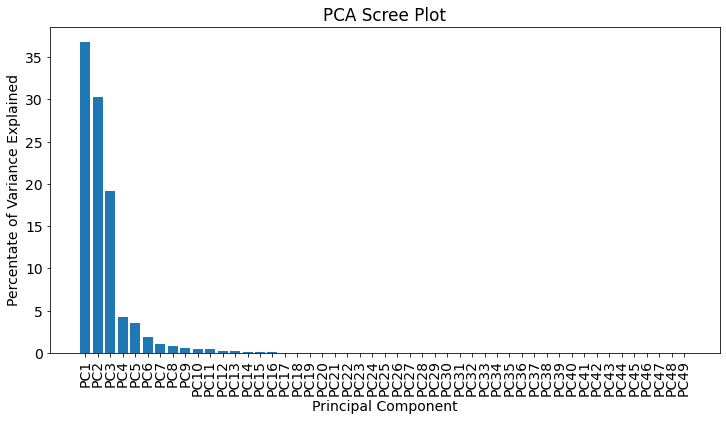

In [27]:
pca = PCA(random_state=1)
X_p = pca.fit_transform(X)

# 그래프로 확인
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.xticks(rotation = 90)
plt.show()

# 데이터프레임화
X_pca = pd.DataFrame(X_p[:,:12], columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [28]:
y = x_data[['유입량', '연']]
idx = y['연'] < 2013
x_train = X_pp.loc[idx]
x_test = X_pp.loc[-idx]

y_train = y.loc[idx]
y_test = y.loc[-idx]
y_train = y_train.drop('연', axis = 1)
y_test = y_test.drop('연', axis = 1)

In [29]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,5.411446,5.319276,-3.973831,-3.781491,5.181488,-1.685487,1.405167,-0.641699,-0.324558,0.652457,0.394411,-0.374472
1,5.519226,4.324257,-3.948328,-3.786436,5.166830,-1.755372,1.267224,-0.584130,-0.438157,0.475870,-0.112293,-0.264794
2,5.633466,3.309620,-3.951097,-3.736515,5.162356,-1.734820,1.590562,-0.788925,-0.435092,0.485314,-0.224966,-0.233958
3,5.734458,2.330476,-3.828903,-3.755122,5.139827,-1.879541,1.060301,-0.525906,-0.626998,0.185914,-0.713048,-0.232430
4,5.838168,1.331067,-3.683135,-3.722349,5.131032,-1.924820,0.964741,-0.564311,-0.629091,0.161397,-0.798395,-0.184925
...,...,...,...,...,...,...,...,...,...,...,...,...
2886,-1.251531,-5.526661,-6.962402,3.803052,-4.171747,1.147132,2.203286,-0.184284,-0.185048,0.313941,0.145191,-0.456043
2887,-1.144797,-6.484944,-7.119915,3.692723,-4.188925,0.970211,1.603081,0.231414,-0.286608,0.195577,-0.190545,-0.412925
2888,-1.044807,-7.436709,-7.171843,3.566127,-4.196255,0.822587,0.655288,0.805099,-0.552275,-0.197000,-1.115411,-0.271510
2889,-0.941830,-8.384748,-7.226417,3.495691,-4.168284,0.758382,-0.134742,1.258324,-0.540259,-0.197031,-0.687461,-0.592987
